In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 
import pandas as pd

datos = pd.read_csv("admission_data.csv")
datos.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [56]:
#Estadistica desciptiva
datos.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [57]:
#Resumen de los datos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [58]:
#Conversion de dataset a dataframe

In [59]:
dfdatos = pd.DataFrame(datos, columns = datos.columns)
dfdatos

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [60]:
#separar variables independientes de la independiente
X = dfdatos.drop("Chance of Admit", axis = 1)
y = dfdatos ["Chance of Admit"]

In [61]:
#separar datos de entrenamiento y datis de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =  0.3, random_state = 1234)

In [62]:
#Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)


LinearRegression()

In [63]:
#Hacer predicciones usando el modelo
predicciones = modelo.predict(X_test)

In [64]:
#Evaluamos el modelo
mse = mean_squared_error(y_test, predicciones)
r2 = r2_score(y_test, predicciones)

print("Error cuadratico medio: ",mse)
print("Coeficiente de Determinacion: ", r2)

Error cuadratico medio:  0.003907582992571896
Coeficiente de Determinacion:  0.8083014622953348


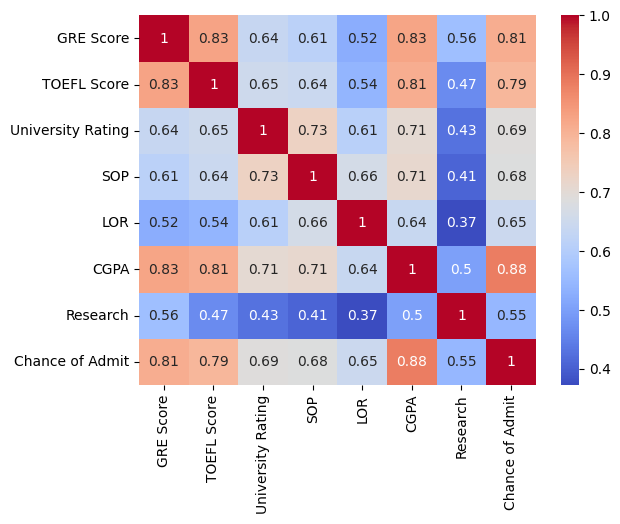

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar la matriz de correlación
matriz = dfdatos.corr()
sns.heatmap(matriz, annot=True, cmap="coolwarm")
plt.show()


In [66]:
#Preprocesamiento de datos
from sklearn.preprocessing import StandardScaler

#Separar variables
X = dfdatos.drop("Chance of Admit", axis = 1)
y = dfdatos ["Chance of Admit"]

#Estandarizar las variables
escala = StandardScaler()
X_scaled = escala.fit_transform(X)

#DataFrame con los datos escalados
dfX_scaled = pd.DataFrame(X_scaled, columns = X.columns)

dfX_scaled.head(20)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152
5,1.198882,1.285102,1.650957,1.137360,-0.523513,1.263738,0.886405
6,0.401282,0.297575,-0.099793,-0.377773,0.558125,-0.623031,0.886405
7,-0.750808,-1.019128,-0.975168,-0.377773,0.558125,-1.119549,-1.128152
8,-1.282541,-0.854540,-1.850542,-1.387862,-2.145970,-0.954043,-1.128152
9,0.578526,0.132987,-0.099793,0.127271,-0.523513,0.038993,-1.128152


In [71]:
def predecir_admision():
    print("Ingresa los valores de las siguientes variables: ")
    gre_score = float (input("Puntaje GRE (0-340): "))
    toefl_score = float (input("Puntaje TOEFL (0-120): "))
    university_rating = float (input("Rating de la Universidad (1-5): "))
    sop = float (input("Carta compromiso (1-5): "))
    lor = float (input("Carta de Recomendacion (1-5): "))
    cgpa = float (input("Promedio de calificaciones (0-10): "))
    research = float (input("Experiencia en investigacion (0-1): "))

    datos_usuario =  pd.DataFrame([[gre_score, toefl_score, university_rating, sop, lor, cgpa, research]],
                                 columns = ["GRE Score", "TOEFL Score", "University Rating", "SOP", "LOR", "CGPA", "Research"])

    datos_usuario_escalados = escala.transform(datos_usuario)
    probabilidad = modelo.predict(datos_usuario_escalados)
    print("Tu probabilidad de admision es: ", probabilidad)

predecir_admision()

Ingresa los valores de las siguientes variables: 


Puntaje GRE (0-340):  340
Puntaje TOEFL (0-120):  120
Rating de la Universidad (1-5):  5
Carta compromiso (1-5):  5
Carta de Recomendacion (1-5):  5
Promedio de calificaciones (0-10):  10
Experiencia en investigacion (0-1):  1


Tu probabilidad de admision es:  [-0.74547919]


C:\Users\Mario\anaconda3\envs\mi_entorno\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
